### Exploratory Data Analysis

#### libraries

In [1]:
import os

import shutil
import keras
import random
import keras_cv
import warnings
from PIL import Image
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.metrics import accuracy_score
from keras.utils import image_dataset_from_directory

c:\Users\sindh\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
warnings.filterwarnings("ignore")

In [3]:
# Reproducability
tf.keras.utils.set_random_seed(69)

#### viewing directory

In [4]:
waste_type_dir = []

for (root, dirs, files) in os.walk('waste-images'):
    if root.split("\\")[-3:-1] == ['images', 'images']:
        waste_type_dir.append(root)

waste_type_dir
        

['waste-images\\images\\images\\aerosol_cans',
 'waste-images\\images\\images\\aluminum_food_cans',
 'waste-images\\images\\images\\aluminum_soda_cans',
 'waste-images\\images\\images\\cardboard_boxes',
 'waste-images\\images\\images\\cardboard_packaging',
 'waste-images\\images\\images\\clothing',
 'waste-images\\images\\images\\coffee_grounds',
 'waste-images\\images\\images\\disposable_plastic_cutlery',
 'waste-images\\images\\images\\eggshells',
 'waste-images\\images\\images\\food_waste',
 'waste-images\\images\\images\\glass_beverage_bottles',
 'waste-images\\images\\images\\glass_cosmetic_containers',
 'waste-images\\images\\images\\glass_food_jars',
 'waste-images\\images\\images\\magazines',
 'waste-images\\images\\images\\newspaper',
 'waste-images\\images\\images\\office_paper',
 'waste-images\\images\\images\\paper_cups',
 'waste-images\\images\\images\\plastic_cup_lids',
 'waste-images\\images\\images\\plastic_detergent_bottles',
 'waste-images\\images\\images\\plastic_foo

In [ ]:
# restructuring directory
# Define the working directory (where images are stored)
working_directory = "waste-images\\images\\images"

# Define the base directory where categories will be moved to
base_directory = "waste-images"

# Iterate through each category folder under the 'images/images' directory
for category in os.listdir(working_directory):
    category_path = os.path.join(working_directory, category)
    
    # Check if it's a directory (should be the category folder)
    if os.path.isdir(category_path):
        
        # Create the category folder in the base directory if it doesn't exist
        new_category_path = os.path.join(base_directory, category)
        os.makedirs(new_category_path, exist_ok=True)

        # Iterate through 'default' and 'real_world' subdirectories inside each category
        for subfolder in ['default', 'real_world']:
            subfolder_path = os.path.join(category_path, subfolder)
            
            # Check if the subfolder exists
            if os.path.exists(subfolder_path):
                # Iterate through all image files in the subfolder
                for img_file in os.listdir(subfolder_path):
                    img_path = os.path.join(subfolder_path, img_file)
                    
                    # Define the new file path in the base category directory
                    new_img_path = os.path.join(new_category_path, f"{subfolder}_{img_file}")
                    
                    # Copy the file to the new category directory
                    shutil.copy(img_path, new_img_path)
                    
                    # Optionally, you can delete the original file after copying
                    os.remove(img_path)
                
                # After copying, you can remove the empty subdirectory (if you want to clean up)
                os.rmdir(subfolder_path)

print("Images successfully moved and subdirectories cleaned.")

Images successfully moved and subdirectories cleaned.


In [5]:
# Function to count images per subfolder
def count_images_per_folder(waste_type_dir):
    for category_path in waste_type_dir:
        category_name = os.path.basename(category_path)  # Extract category name
        print(f"Category: {category_name}")

        # Check for "default" and "real_world" subfolders
        default_path = os.path.join(category_path, "default")
        real_world_path = os.path.join(category_path, "real_world")

        if not os.path.exists(default_path) or not os.path.exists(real_world_path):
            print(f"  Missing subfolders in {category_name}. Expected 'default' and 'real_world'.")
            continue

        # Count images in each subfolder
        default_images = len([f for f in os.listdir(default_path) if os.path.isfile(os.path.join(default_path, f))])
        real_world_images = len([f for f in os.listdir(real_world_path) if os.path.isfile(os.path.join(real_world_path, f))])

        # Output results
        print(f"  Default: {default_images} images")
        print(f"  Real World: {real_world_images} images")

        # Verify expected count
        if default_images != 250 or real_world_images != 250:
            print(f"  WARNING: Expected 250 images in each folder, but found {default_images} (default) and {real_world_images} (real_world).")

# Run the function
count_images_per_folder(waste_type_dir)


Category: aerosol_cans
  Default: 250 images
  Real World: 250 images
Category: aluminum_food_cans
  Default: 250 images
  Real World: 250 images
Category: aluminum_soda_cans
  Default: 250 images
  Real World: 250 images
Category: cardboard_boxes
  Default: 250 images
  Real World: 250 images
Category: cardboard_packaging
  Default: 250 images
  Real World: 250 images
Category: clothing
  Default: 250 images
  Real World: 250 images
Category: coffee_grounds
  Default: 250 images
  Real World: 250 images
Category: disposable_plastic_cutlery
  Default: 250 images
  Real World: 250 images
Category: eggshells
  Default: 250 images
  Real World: 250 images
Category: food_waste
  Default: 250 images
  Real World: 250 images
Category: glass_beverage_bottles
  Default: 250 images
  Real World: 250 images
Category: glass_cosmetic_containers
  Default: 250 images
  Real World: 250 images
Category: glass_food_jars
  Default: 250 images
  Real World: 250 images
Category: magazines
  Default: 250 

### Assumption: All materials are food and beverage free
Also..talk about liquid disposal fountain next to the trash

In [29]:
food_waste = ['coffee_grounds','eggshells', 'food_waste', 'tea_bags']
mixed_recycle = ['aluminum_food_cans', 'aluminum_soda_cans', 'aerosol_cans', 'cardboard_boxes', 'cardboard_packaging','glass_beverage_bottles', 'glass_cosmetic_containers', 'glass_food_jars', 'magazines', 'newspaper', 'office_paper', 'plastic_detergent_bottles', 'plastic_food_containers', 'plastic_soda_bottles', 'plastic_water_bottles','steel_food_cans']
trash = ['clothes','styrofoam_cups', 'styrofoam_food_containers', 'disposable_plastic_cutlery', 'paper_cups', 'paper_cup_lids', 'plastic_shopping_bags','plastic_straws', 'plastic_trash_bags', 'shoes' ]

In [30]:
if len(food_waste) + len(mixed_recycle) + len(trash) == len(waste_type_dir):
    print("All categories included!")

All categories included!


In [32]:
# Function to map materials to their directories
def map_to_directories(materials, directories):
    return [dir_path for dir_path in directories if dir_path.split('\\')[-1] in materials]

# Map each list to directories
food_waste_dirs = map_to_directories(food_waste, waste_type_dir)
mixed_recycle_dirs = map_to_directories(mixed_recycle, waste_type_dir)
trash_dirs = map_to_directories(trash, waste_type_dir)

# Print results
print("Food Waste Directories:", food_waste_dirs)
print("Mixed Recycle Directories:", mixed_recycle_dirs)
print("Trash Directories:", trash_dirs)

Food Waste Directories: ['waste-images\\images\\images\\coffee_grounds', 'waste-images\\images\\images\\eggshells', 'waste-images\\images\\images\\food_waste', 'waste-images\\images\\images\\tea_bags']
Mixed Recycle Directories: ['waste-images\\images\\images\\aerosol_cans', 'waste-images\\images\\images\\aluminum_food_cans', 'waste-images\\images\\images\\aluminum_soda_cans', 'waste-images\\images\\images\\cardboard_boxes', 'waste-images\\images\\images\\cardboard_packaging', 'waste-images\\images\\images\\glass_beverage_bottles', 'waste-images\\images\\images\\glass_cosmetic_containers', 'waste-images\\images\\images\\glass_food_jars', 'waste-images\\images\\images\\magazines', 'waste-images\\images\\images\\newspaper', 'waste-images\\images\\images\\office_paper', 'waste-images\\images\\images\\plastic_detergent_bottles', 'waste-images\\images\\images\\plastic_food_containers', 'waste-images\\images\\images\\plastic_soda_bottles', 'waste-images\\images\\images\\plastic_water_bottles

In [33]:
# verify if all categories' working directory was matched
print("Food Waste: ", len(food_waste_dirs)==len(food_waste))
print("Mixed Recycling: ", len(mixed_recycle_dirs)==len(mixed_recycle))
print("Trash: ", len(trash_dirs)==len(trash_dirs))

Food Waste:  True
Mixed Recycling:  True
Trash:  True


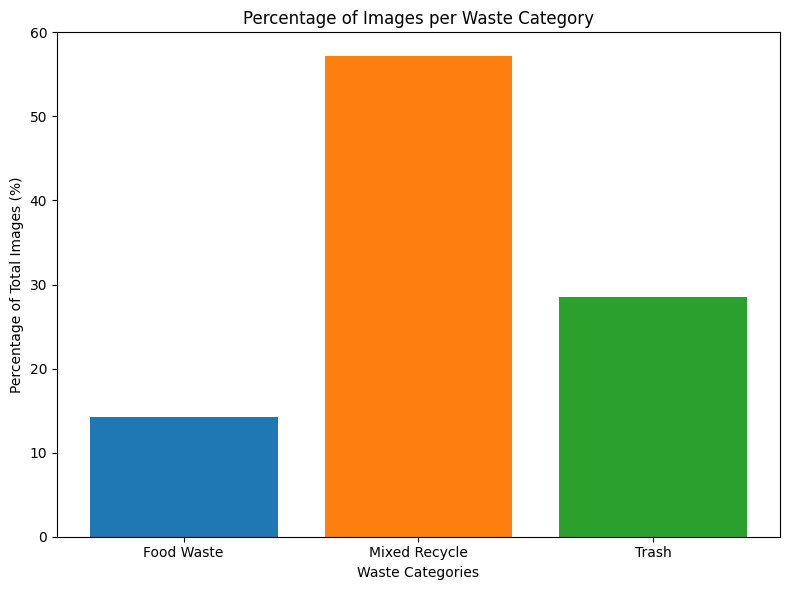

In [34]:
# Function to count total images in default and real_world subdirectories for a category
def count_total_images(category_dirs):
    total_images = 0
    for dir_path in category_dirs:
        default_path = os.path.join(dir_path, "default")
        real_world_path = os.path.join(dir_path, "real_world")

        # Count images in default and real_world subdirectories
        default_count = len([f for f in os.listdir(default_path) if os.path.isfile(os.path.join(default_path, f))]) if os.path.exists(default_path) else 0
        real_world_count = len([f for f in os.listdir(real_world_path) if os.path.isfile(os.path.join(real_world_path, f))]) if os.path.exists(real_world_path) else 0

        # Add to total count
        total_images += (default_count + real_world_count)
    return total_images

# Calculate total image counts for each category
food_waste_total = count_total_images(food_waste_dirs)
mixed_recycle_total = count_total_images(mixed_recycle_dirs)
trash_total = count_total_images(trash_dirs)

# Calculate total images across all categories
overall_total = food_waste_total + mixed_recycle_total + trash_total

# Calculate percentages
categories = ['Food Waste', 'Mixed Recycle', 'Trash']
percentages = [
    (food_waste_total / overall_total) * 100,
    (mixed_recycle_total / overall_total) * 100,
    (trash_total / overall_total) * 100
]

# Create the bar plot
plt.figure(figsize=(8, 6))
plt.bar(categories, percentages, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.xlabel('Waste Categories')
plt.ylabel('Percentage of Total Images (%)')
plt.title('Percentage of Images per Waste Category')
plt.tight_layout()
plt.show()

### Using GANs to Create Synthetic Food Waste Images 

In [ ]:
#preprocess data 
coffee_grounds_path = food_waste_dirs[0]

image_size = (64,64)
images = []

for img_file in os.listdir(coffee_grounds_path):
    img_path = os.path.join(coffee_grounds_path, img_file)
    img = Image.open(img_path).convert("RGB")  # Ensure all images have 3 channels (RGB)
    img = img.resize(image_size)  # Resize to target size
    images.append(np.array(img))

# Convert to a NumPy array
images = np.array(images)

['waste-images\\images\\images\\coffee_grounds',
 'waste-images\\images\\images\\eggshells',
 'waste-images\\images\\images\\food_waste',
 'waste-images\\images\\images\\tea_bags']

In [ ]:
# GAN architecture 